# Task 4: Conceptual Questions

Ques.1. What is entropy and information gain?

Ans.1.
Entropy represents the level of uncertainty or disorder in a dataset. In the context of decision trees, it helps to evaluate how pure a node is in terms of class distribution.

Information Gain refers to the amount by which entropy decreases after the data is divided based on a particular feature. It helps identify the attribute that best separates the classes.

Ques.2. Explain the difference between Gini Index and Entropy?

Ans.2. 

| **Aspect**           | **Gini Index**                                                | **Entropy**                                          |
| -------------------- | ------------------------------------------------------------- | ---------------------------------------------------- |
| Definition           | Evaluates impurity based on the chance of incorrect labeling  | Measures impurity by calculating information content |
| Value Range          | Ranges from 0 (pure) to 0.5 (highest impurity in binary case) | Ranges from 0 (pure) to 1 (highest in binary case)   |
| Speed of Computation | Faster, as it avoids log functions                            | Slower due to logarithmic calculations               |
| Common Usage         | Often applied in CART algorithm                               | Commonly used in ID3 and C4.5 algorithms             |


Ques.3. How can a decision tree overfit? How can this be avoided?

Ans.3.
A decision tree tends to overfit when it grows too complex or deep, capturing not just meaningful patterns but also noise and outliers in the training data.

To prevent overfitting:

Apply pruning techniques to trim extra branches.

Limit the maximum depth of the tree.

Specify a minimum number of samples required to split a node or stay in a leaf.

Use cross-validation to fine-tune model parameters effectively.


# Task 5: Decision Tree on Titanic Dataset

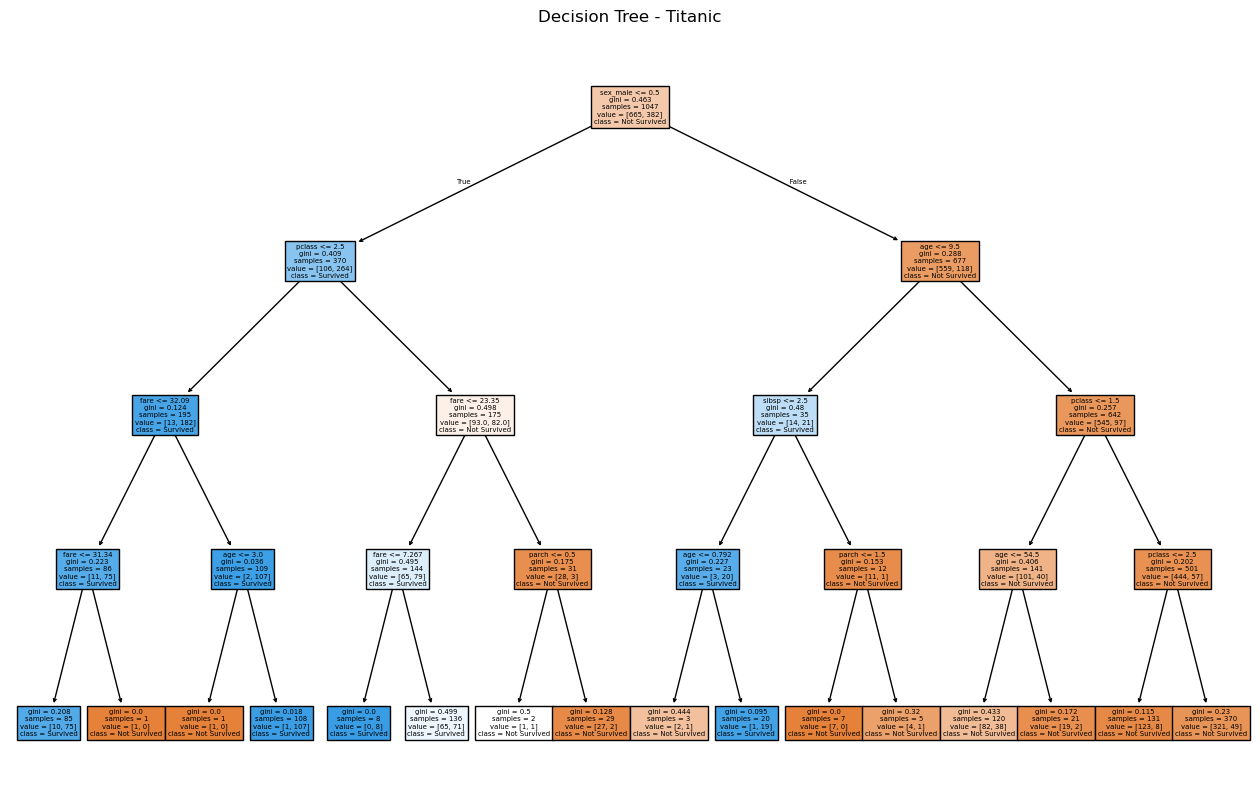

Accuracy: 0.76


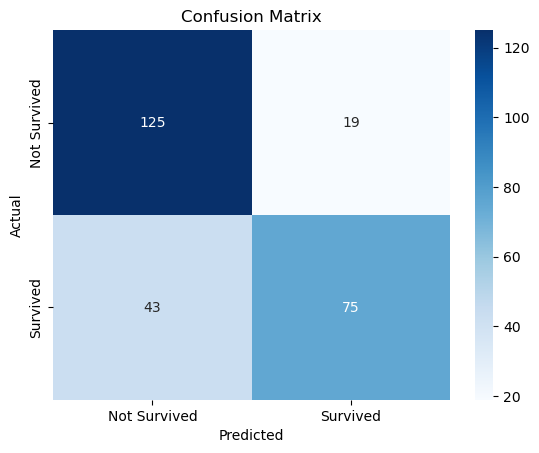

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

data = fetch_openml('titanic', version=1, as_frame=True)
df = data.frame

df = df.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'])
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
df = df.dropna(subset=['survived'])

features = df.drop(columns=['survived'])
target = df['survived'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(tree, feature_names=features.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree - Titanic")
plt.show()

predictions = tree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Task 6: Model Tuning

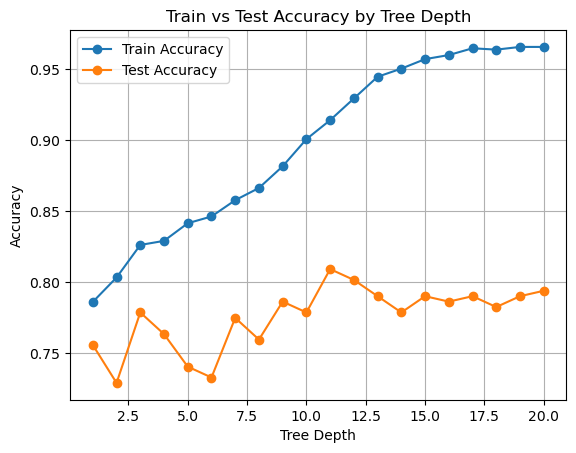

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = fetch_openml('titanic', version=1, as_frame=True)
df = data.frame

df = df.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'])
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
df = df.dropna(subset=['survived'])

features = df.drop(columns=['survived'])
target = df['survived'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

depth_values = range(1, 21)
train_scores = []
test_scores = []

for d in depth_values:
    clf = DecisionTreeClassifier(max_depth=d, min_samples_split=2, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, clf.predict(X_test)))

plt.plot(depth_values, train_scores, label="Train Accuracy", marker='o')
plt.plot(depth_values, test_scores, label="Test Accuracy", marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy by Tree Depth")
plt.legend()
plt.grid(True)
plt.show()
